In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score


In [6]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets for comprehensive analysis
merged = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

customer_features = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price_x': 'mean'
}).reset_index()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalValue', 'Quantity', 'Price_x']])

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Davies-Bouldin Index: 0.9183282802588962
Silhouette Score: 0.3353833748488999


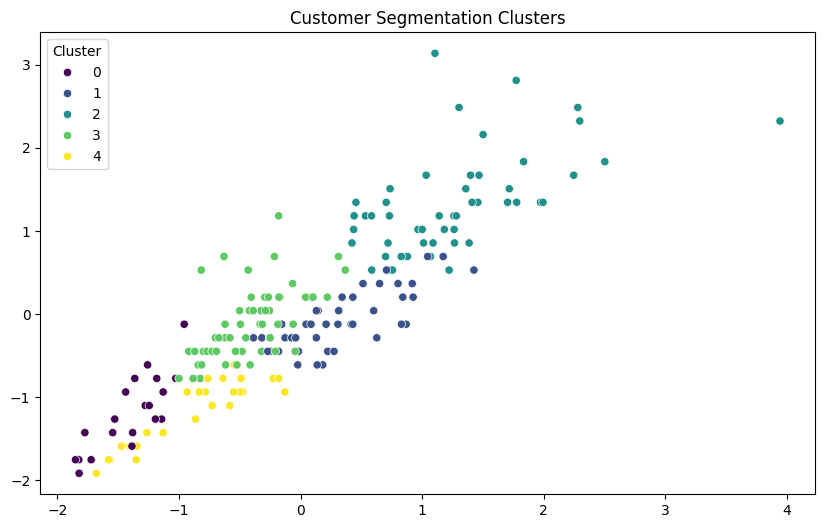

In [7]:
# Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate clustering
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
silhouette_avg = silhouette_score(scaled_features, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1], hue=customer_features['Cluster'], palette="viridis"
)
plt.title("Customer Segmentation Clusters")
plt.show()

# Save cluster assignments
customer_features[['CustomerID', 'Cluster']].to_csv("Gokul_Manoj_Clustering.csv", index=False)